##### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import logging
import os

from functions.temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "ticks", font="verdana") # font_scale = 1.35)

In [2]:
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Paths

In [3]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/analysis_scripts/"
csv_path = os.path.join(path, "csv/")
excel_path = os.path.join(path, "excel/")
plot_path = os.path.join(path, "plot/")

In [4]:
path_shiny_mouse = os.path.join(csv_path, "current_shiny_mouse.csv")
path_shiny_human = os.path.join(csv_path, "current_shiny_human.csv")

##### Start Code

In [5]:
fields_shiny = ["cell_name", "cell_specimen_project", "Norm_Marker_Sum.0.4_label",
                "marker_sum_norm_label", "rna_amplification_pass_fail",
                "percent_cdna_longer_than_400bp", "amplified_quantity_ng", "sample_id"]
shiny_mouse = read_file(path_shiny_mouse, fields_shiny) #10839 rows
shiny_human = read_file(path_shiny_human, fields_shiny) #3592 rows

INFO:functions.temp_funcs:Read file in as a pandas dataframe
INFO:functions.temp_funcs:Read file in as a pandas dataframe


In [6]:
shiny_mouse.dropna(subset=["cell_specimen_project"],inplace=True) #10834 rows
shiny_human.dropna(subset=["cell_specimen_project"],inplace=True) #3578 rows

##### Filter project code

In [7]:
def create_container_df(df, container_col):
    """Creates container label based on original container column
    Args:
        df: a pandas dataframe
        container_col: a column name with the container label information
    Return:
        df: a pandas dataframe with a new column with container labels
    """
    df["collaborator_label"] = df[container_col].str[0:2]
    return df

In [8]:
#shiny_human["container_label"].unique()
#PG for gabor
#PH for mansvelder
#P1-PB for AIBS
#['P1', 'P2', 'P8', 'P9', 'PA', 'PE', 'PF', 'PG', 'PH', 'PC', 'PB',
#       'PX', 'P5', 'P0', 'PM', 'P7', 'P3', 'PT', 'P6', 'PQ', 'P4'],

In [9]:
shinym = filter_df(shiny_mouse, "cell_specimen_project", "mIVSCC-MET") 
shinyh = filter_df(shiny_human, "cell_specimen_project", "hIVSCC-MET")
shinyh = create_container_df(shinyh, "sample_id")

INFO:functions.temp_funcs:Filtered dataframe based on cell_specimen_project == mIVSCC-MET
INFO:functions.temp_funcs:Filtered dataframe based on cell_specimen_project == hIVSCC-MET
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
shinyh["collaborator_label"].unique()

array(['P1', 'P2', 'P8', 'P9', 'PA', 'PE', 'PF', 'PB', 'PG', 'P7', 'P0',
       'PH', 'PX', 'P3', 'P5', 'P6'], dtype=object)

In [11]:
shinym.rename(columns={"Norm_Marker_Sum.0.4_label" : "NMS Pass/Fail",
                      "rna_amplification_pass_fail" : "RNA amp Pass/Fail",
                      "marker_sum_norm_label": "NMS score",
                      "percent_cdna_longer_than_400bp" : "cDNA quality (%>400 bp)",
                      "amplified_quantity_ng" : "Amplified content (ng)"}, inplace=True)
shinyh.rename(columns={"Norm_Marker_Sum.0.4_label" : "NMS Pass/Fail",
                      "rna_amplification_pass_fail" : "RNA amp Pass/Fail",
                      "marker_sum_norm_label": "NMS score",
                      "percent_cdna_longer_than_400bp" : "cDNA quality (%>400 bp)",
                      "amplified_quantity_ng" : "Amplified content (ng)"}, inplace=True)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
shinym.dropna(subset=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"], inplace=True)
shinym = shinym[shinym["cDNA quality (%>400 bp)"] <=1]
shinym = shinym[shinym["Amplified content (ng)"] <=50]

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
shinym = filter_df(shinym, "NMS Pass/Fail", True) #7322 rows

INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == True


In [14]:
shinym = filter_df(shinym, "RNA amp Pass/Fail", "Fail") #566 rows
#shinym = filter_df(shinym, "RNA amp Pass/Fail", "Pass") #6756 rows

INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Fail


In [15]:
shinym["RNA amp Pass/Fail"].unique()

array(['Fail'], dtype=object)

In [16]:
shinym

,sample_id,cell_name,cDNA quality (%>400 bp),RNA amp Pass/Fail,Amplified content (ng),cell_specimen_project,NMS score,NMS Pass/Fail
1,P2S4_171129_055_A01,Crh-IRES-Cre_ZJH;Sst-IRES-FlpO;Ai65-362357.04.01.02,0.242,Fail,26.158425,mIVSCC-MET,0.717450,True
142,P9S4_180430_407_A01,Ndnf-IRES2-dgCre;Slc32a1-IRES2-FlpO;Ai65-387320.05.01.04,0.442,Fail,8.111178,mIVSCC-MET,0.646747,True
164,PES4_180824_653_A01,Ndnf-IRES2-dgCre;Ai14-409200.06.02.03,0.552,Fail,2.834967,mIVSCC-MET,0.605926,True
168,P9S4_171128_401_A01,Ndnf-IRES2-dgCre;Ai14-361706.05.01.01,0.494,Fail,8.340050,mIVSCC-MET,0.988112,True
182,PAS4_171201_455_A01,Ndnf-IRES2-dgCre;Ai14-361703.06.02.01,0.510,Fail,3.820926,mIVSCC-MET,0.566280,True
184,P9S4_180807_415_A01,Ndnf-IRES2-dgCre;Ai14-406655.03.01.02,0.463,Fail,9.301540,mIVSCC-MET,0.643057,True
193,P9S4_171206_405_A01,Gad2-IRES-Cre;Ai14-362149.05.01.01,0.305,Fail,8.719505,mIVSCC-MET,0.789139,True
207,P2S4_180813_051_A01,Htr3a-Cre_NO152;Ai14-407562.04.02.01,0.413,Fail,8.417287,mIVSCC-MET,0.635759,True
233,PAS4_180319_455_A01,Htr3a-Cre_NO152;Ai14-381042.04.02.01,0.299,Fail,18.029275,mIVSCC-MET,0.650083,True
268,P2S4_180703_051_A01,Gad2-IRES-Cre;Ai14-399697.03.01.01,0.431,Fail,9.590687,mIVSCC-MET,0.731361,True


In [17]:
shinyh.dropna(subset=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"], inplace=True)
shinyh = shinyh[shinyh["cDNA quality (%>400 bp)"] <=1]
shinyh = shinyh[shinyh["Amplified content (ng)"] <=50]
shinyh = filter_df(shinyh, "RNA amp Pass/Fail", "Fail") #1298 rows
shinyh = filter_df(shinyh, "NMS Pass/Fail", True) #566 rows

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Fail
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == True


In [18]:
collaborator_dict = {"PG" : "Gabor", "PH" : "Mansvelder"}
for collab in ["P1", "P2", "P6", "P7", "P8", "P9", "PA", "PB", "PE", "PX"]:
    collaborator_dict[collab] = "AIBS"

shinyh["collaborator_label"] = shinyh["collaborator_label"].replace(collaborator_dict)

In [19]:
shinyh["collaborator_label"].unique()

array(['AIBS', 'Gabor', 'Mansvelder'], dtype=object)

In [20]:
pg = filter_df(shinyh, "collaborator_label", "Gabor")
pg

INFO:functions.temp_funcs:Filtered dataframe based on collaborator_label == Gabor


,sample_id,cell_name,cDNA quality (%>400 bp),RNA amp Pass/Fail,Amplified content (ng),cell_specimen_project,NMS score,NMS Pass/Fail,collaborator_label
673,PGS4_180919_803_A01,H18.28.025.11.08.01,0.364,Fail,9.094264,hIVSCC-MET,0.545243,True,Gabor
728,PGS4_180222_402_A01,H18.28.009.11.04.02,0.346,Fail,7.960215,hIVSCC-MET,0.621337,True,Gabor
799,PGS4_180613_806_A01,H18.28.020.11.10.01,0.395,Fail,8.440221,hIVSCC-MET,0.766405,True,Gabor
815,PGS4_180301_704_A01,H18.28.012.11.03.02,0.386,Fail,25.596975,hIVSCC-MET,0.944690,True,Gabor
839,PGS4_180301_703_A01,H18.28.012.11.03.01,0.401,Fail,27.413574,hIVSCC-MET,0.859369,True,Gabor
1555,PGS4_180126_003_A01,H18.28.001.03.03,0.417,Fail,9.089050,hIVSCC-MET,0.759162,True,Gabor
1558,PGS4_180427_707_A01,H18.28.015.11.17.01,0.409,Fail,11.998480,hIVSCC-MET,0.900402,True,Gabor
1562,PGS4_180928_701_A01,H18.28.026.11.05.01,0.406,Fail,21.735619,hIVSCC-MET,0.568855,True,Gabor
1691,PGS4_180613_803_A01,H18.28.020.11.06.01,0.411,Fail,6.824818,hIVSCC-MET,0.719519,True,Gabor
1719,PGS4_180919_701_A01,H18.28.025.11.05.01,0.361,Fail,6.346713,hIVSCC-MET,0.517821,True,Gabor


In [21]:
ph = filter_df(shinyh, "collaborator_label", "Mansvelder")
ph

INFO:functions.temp_funcs:Filtered dataframe based on collaborator_label == Mansvelder


,sample_id,cell_name,cDNA quality (%>400 bp),RNA amp Pass/Fail,Amplified content (ng),cell_specimen_project,NMS score,NMS Pass/Fail,collaborator_label
1568,PHS4_180321_401_A01,H18.29.124.11.02.01,0.437,Fail,6.429495,hIVSCC-MET,0.648339,True,Mansvelder
2255,PHS4_180523_305_A01,H18.29.126.11.32.05,0.315,Fail,12.407644,hIVSCC-MET,0.427593,True,Mansvelder


In [22]:
aibs = filter_df(shinyh, "collaborator_label", "AIBS")
aibs

INFO:functions.temp_funcs:Filtered dataframe based on collaborator_label == AIBS


,sample_id,cell_name,cDNA quality (%>400 bp),RNA amp Pass/Fail,Amplified content (ng),cell_specimen_project,NMS score,NMS Pass/Fail,collaborator_label
17,PAS4_180321_451_A01,H18.03.005.11.04.01,0.601,Fail,2.845122,hIVSCC-MET,0.781291,True,AIBS
74,P9S4_180320_408_A01,H18.03.005.11.11.01,0.378,Fail,5.780332,hIVSCC-MET,0.421988,True,AIBS
84,PBS4_180326_507_A01,H18.06.005.11.06.07,0.483,Fail,3.473042,hIVSCC-MET,0.777621,True,AIBS
149,PBS4_171219_501_A01,H17.03.016.11.03.01,0.397,Fail,7.926456,hIVSCC-MET,0.661915,True,AIBS
264,P2S4_180320_054_A01,H18.03.005.11.09.01,0.391,Fail,6.771181,hIVSCC-MET,0.745101,True,AIBS
353,PBS4_180621_503_A01,H18.26.403.11.06.01.04,0.240,Fail,20.101078,hIVSCC-MET,1.131692,True,AIBS
369,P1S4_190311_002_A01,H19.03.306.11.03.01.06,0.283,Fail,5.978587,hIVSCC-MET,0.650459,True,AIBS
516,PAS4_190419_452_A01,H19.03.309.11.10.02.03,0.374,Fail,16.029025,hIVSCC-MET,1.151552,True,AIBS
723,PES4_180926_653_A01,H18.03.317.12.16.01.03,0.408,Fail,5.592009,hIVSCC-MET,0.689457,True,AIBS
803,P1S4_180926_001_A01,H18.03.317.13.23.01.01,0.492,Fail,5.339378,hIVSCC-MET,0.731039,True,AIBS


##### Filter RNA Amp pass_fail

In [23]:
shiny = pd.concat([shinym, shinyh], ignore_index=True, sort =False) #8593
shiny = shiny[shiny["cDNA quality (%>400 bp)"] <=1] #1577
shiny = shiny[shiny["Amplified content (ng)"] <=50] #1550

##### Plots

In [24]:
colors=["#41ab5d", "#ef3b2c"]
spec_colors= {"mIVSCC-MET" : "#ef3b2c", "hIVSCC-MET" : "#4292c6"}

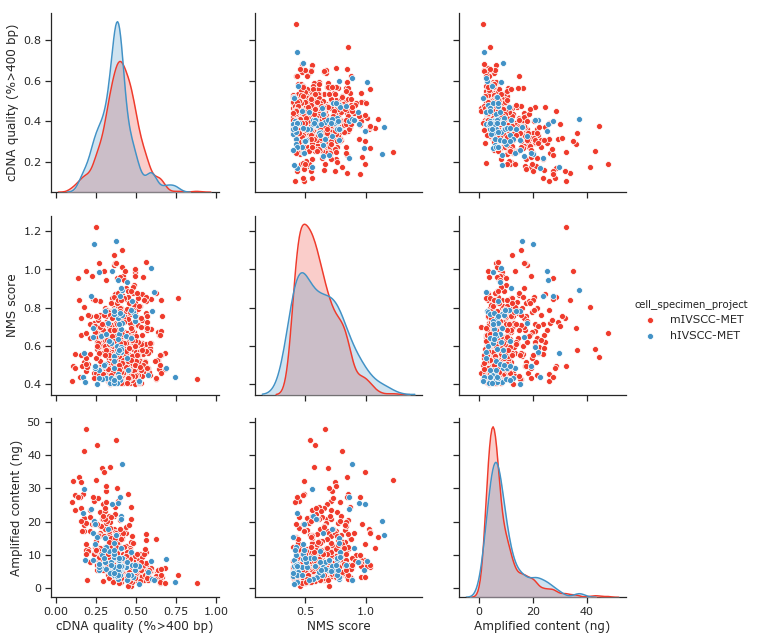

In [25]:
ax = sns.pairplot(data=shiny, vars=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"],
                  height=3, diag_kind="kde", hue="cell_specimen_project", palette=spec_colors)
plt.savefig(plot_path + "mouse_human_pairplot.jpeg", bbox_inches="tight")

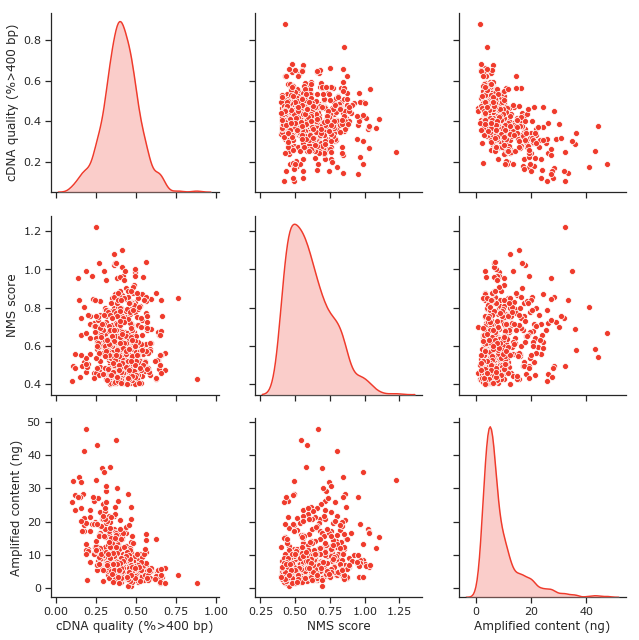

In [26]:
ax = sns.pairplot(data=shinym, vars=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"],
                  height=3, diag_kind="kde", hue="cell_specimen_project",
                  palette=spec_colors)
ax._legend.remove()
plt.savefig(plot_path + "mouse_pairplot.jpeg", bbox_inches="tight")

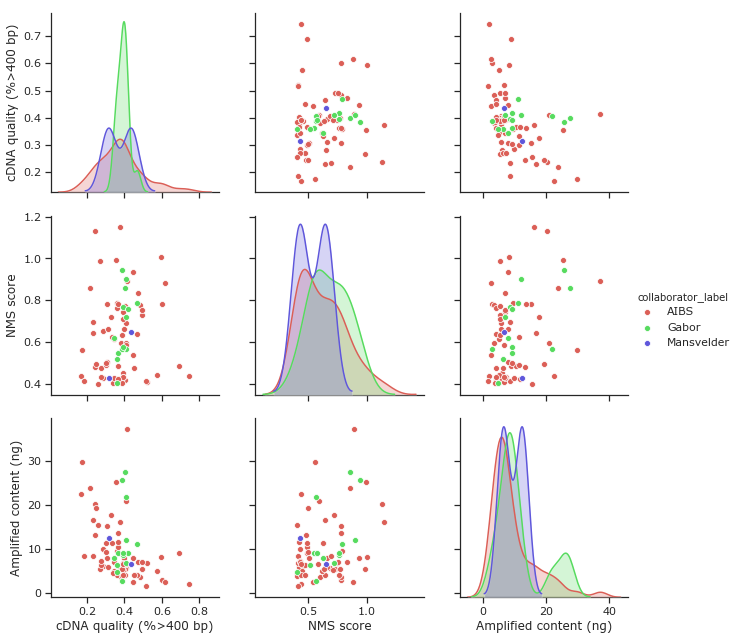

In [29]:
ax = sns.pairplot(data=shinyh, vars=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"],
                  height=3, diag_kind="kde", hue="collaborator_label", palette="hls")
plt.savefig(plot_path + "human_pairplot.jpeg", bbox_inches="tight")

In [ ]:
fig_dims = (3, 15)
f, axes = plt.subplots(nrows=3, ncols=1, figsize=fig_dims)

ax = sns.violinplot(x="cell_specimen_project", y="cDNA quality (%>400 bp)", data=shiny[shiny["cDNA quality (%>400 bp)"] <=1], 
                    order=["mIVSCC-MET", "hIVSCC-MET"], inner="box", scale="area",
                    palette=spec_colors, saturation=1, ax=axes[0])
ax1 = sns.violinplot(x="cell_specimen_project", y="NMS score", data=shiny[shiny["NMS score"] <=1.5],
                     order=["mIVSCC-MET", "hIVSCC-MET"], inner="box", scale="area",
                     palette=spec_colors, saturation=1, ax=axes[1])
ax2 = sns.violinplot(x="cell_specimen_project", y="Amplified content (ng)",
                     data=shiny[shiny["Amplified content (ng)"] <=50],
                     order=["mIVSCC-MET", "hIVSCC-MET"], inner="box", scale="area",
                     palette=spec_colors, saturation=1, ax=axes[2])


ax.set(xticklabels=[])
ax1.set(xticklabels=[])

ax.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Specimen Project Label")

nobs = shiny["cell_specimen_project"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 1, nobs[tick], horizontalalignment='center', size="large", color='black', weight='bold')
    
plt.savefig(plot_path + "rna_amp_violinplot.jpeg", bbox_inches="tight")